In [ ]:
'''
【项目14】  婚恋配对实验

婚恋配对模拟规则：
① 按照一定规则生成了1万男性+1万女性样本：
   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分
   ** 财富值符合指数分布，内涵和颜值符合正态分布
   ** 三项的平均值都为60分，标准差都为15分
② 模拟实验。基于现实世界的提炼及适度简化，我们概括了三个最主流的择偶策略：
   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低5分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
③ 每一轮实验中，我们将三种策略随机平分给所有样本（即采用每种策略的男性有3333个样本）
④ 我们为每位单身男女随机选择一个对象，若双方互相符合要求就算配对成功，配对失败的男女则进入下一轮配对。

1、样本数据处理
   ** 按照一定规则生成了1万男性+1万女性样本：
   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分
   ** 财富值符合指数分布，内涵和颜值符合正态分布
   ** 三项的平均值都为60分，标准差都为15分
要求：
① 构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性数据样本
   ** 包括三个指标：财富、内涵、外貌
② 绘制柱状图来查看每个人的属性分值情况
提示：
① 正态分布：np.random.normal(loc=60, scale=15, size=n)
② 指数分布：np.random.exponential(scale=15, size=n) + 45

2、生成99个男性、99个女性样本数据，分别针对三种策略构建算法函数
   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
   ** 每一轮实验中，我们将三种策略随机平分给所有样本，这里则是三种策略分别33人
   ** 这里不同策略匹配结果可能重合，所以为了简化模型 
   → 先进行策略1模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据,再进行策略2模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据,再进行策略3模拟
① 生成样本数据
② 给男性样本数据，随机分配策略选择 → 这里以男性为出发作为策略选择方
③ 尝试做第一轮匹配，记录成功的匹配对象，并筛选出失败的男女性进入下一轮匹配
④ 构建模型，并模拟1万男性+1万女性的配对实验
⑤ 通过数据分析，回答几个问题：
   ** 百分之多少的样本数据成功匹配到了对象？
   ** 采取不同择偶策略的匹配成功率分别是多少？
   ** 采取不同择偶策略的男性各项平均分是多少？
提示：
① 择偶策略评判标准：
   ** 若匹配成功，则该男性与被匹配女性在这一轮都算成功，并退出游戏
   ** 若匹配失败，则该男性与被匹配女性再则一轮都算失败，并进入下一轮
   ** 若同时多个男性选择了同一个女性，且满足成功配对要求，则综合评分高的男性算为匹配成功
② 构建空的数据集，用于存储匹配成功的数据
③ 每一轮匹配之后，删除成功匹配的数据之后，进入下一轮，这里删除数据用df.drop()
④ 这里建议用while去做迭代 → 当该轮没有任何配对成功，则停止实验

3、以99男+99女的样本数据，绘制匹配折线图
要求：
① 生成样本数据，模拟匹配实验
② 生成绘制数据表格
③ bokhe制图
   ** 这里设置图例，并且可交互（消隐模式）
提示：
① bokeh制图时，y轴为男性，x轴为女性
② 绘制数据表格中，需要把男女性的数字编号提取出来，这样图表横纵轴好识别
③ bokhe绘制折线图示意：p.line([0,女性数字编号，女性数字编号],[男性数字编号，男性数字编号，0])

4、生成“不同类型男女配对成功率”矩阵图
要求：
① 以之前1万男+1万女实验的结果为数据
② 按照财富值、内涵值、外貌值分别给三个区间，以区间来评判“男女类型”
   ** 高分（70-100分），中分（50-70分），低分（0-50分）
   ** 按照此类分布，男性女性都可以分为27中类型：财高品高颜高、财高品中颜高、财高品低颜高、... （财→财富，品→内涵，颜→外貌）
③ bokhe制图
   ** 散点图
   ** 27行*27列，散点的颜色深浅代表匹配成功率
提示：
① 注意绘图的数据结构
② 这里散点图通过xy轴定位数据，然后通过设置颜色的透明度来表示匹配成功率
③ alpha字段为每种类型匹配成功率标准化之后的结果，再乘以一个参数
   → data['alpha'] = (data['chance'] - data['chance'].min())/(data['chance'].max() - data['chance'].min())*8   

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
# 导入时间模块

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource,HoverTool
# 导入bokeh绘图模块

Loading BokehJS ...

In [ ]:
'''
1、样本数据处理
   ** 按照一定规则生成了1万男性+1万女性样本：
   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分
   ** 财富值符合指数分布，内涵和颜值符合正态分布
   ** 三项的平均值都为60分，标准差都为15分
要求：
① 构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性数据样本
   ** 包括三个指标：财富、内涵、外貌
② 绘制柱状图来查看每个人的属性分值情况
提示：
① 正态分布：np.random.normal(loc=60, scale=15, size=n)
② 指数分布：np.random.exponential(scale=15, size=n) + 45

'''

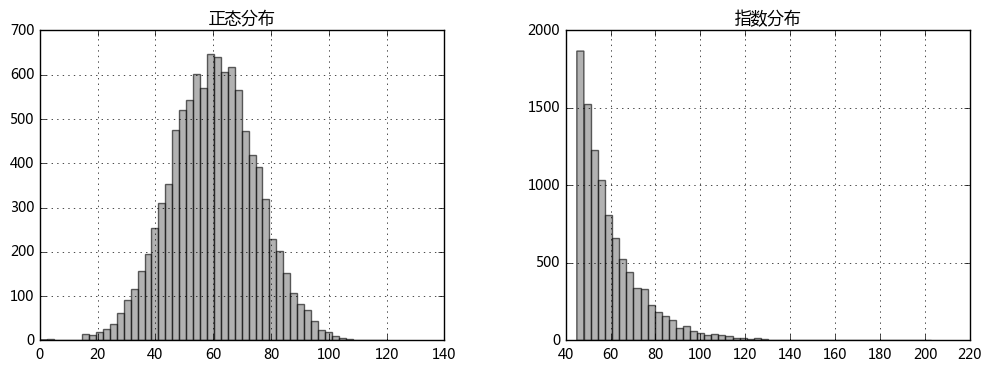

In [2]:
# 分别生成1万条随机数据，分别为正态分布、指数分布，要求数据均值为60，标准差为15

data_norm = pd.DataFrame({'正态分布':np.random.normal(loc = 60,scale = 15,size = 10000)})
data_exp = pd.DataFrame({'指数分布':np.random.exponential(scale=15, size=10000) + 45})
# 构建样本数据 → 正态分布/指数分布

fig,axes = plt.subplots(1,2,figsize = (12,4))
data_norm.hist(bins=50,ax = axes[0],grid = True,color = 'gray',alpha = 0.6)
data_exp.hist(bins = 50,ax = axes[1],grid = True,color = 'gray',alpha = 0.6)
plt.show()

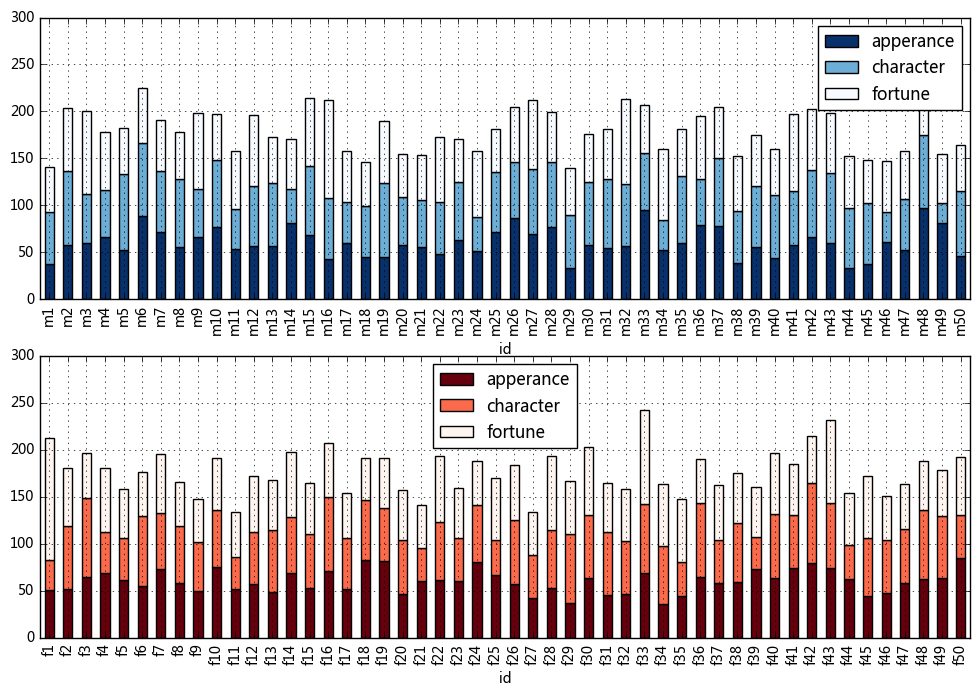

,apperance,character,fortune,score
id,,,,
m1,37.733948,55.130102,47.721247,46.861765
m2,57.549231,79.348812,66.320971,67.739671
m3,59.712555,52.848365,87.618800,66.726573
m4,66.233835,50.049238,61.395722,59.226265
m5,52.193095,81.574106,48.402082,60.723094


In [3]:
# 构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性数据样本

def create_sample(n,gender):
    sample_data = pd.DataFrame({'fortune':np.random.exponential(scale=15, size=n) + 45,
                                'apperance':np.random.normal(loc = 60,scale = 15,size = n),
                                'character':np.random.normal(loc = 60,scale = 15,size = n)},
                               index = [gender + str(i) for i in range(1,n+1)])
    sample_data.index.name = 'id'
    sample_data['score'] = sample_data.sum(axis = 1)/3
    # 计算综合评分
    return sample_data
# 创建函数

sample_m = create_sample(10000,'m')
sample_f = create_sample(10000,'f')
# 生成男女样本数据

fig,axes = plt.subplots(2,1,figsize = (12,8))
sample_m[['apperance','character','fortune']].iloc[:50].plot(kind='bar',colormap='Blues_r',grid = True,stacked=True,ax = axes[0],ylim = [0,300]) 
sample_f[['apperance','character','fortune']].iloc[:50].plot(kind='bar',colormap='Reds_r',grid = True,stacked=True,ax = axes[1],ylim = [0,300]) 
plt.show()
# 出图查看数据

sample_m.head()
# 查看男性样本数据分布

In [ ]:
'''
2、生成99个男性、99个女性样本数据，分别针对三种策略构建算法函数
   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
   ** 每一轮实验中，我们将三种策略随机平分给所有样本，这里则是三种策略分别33人
   ** 这里不同策略匹配结果可能重合，所以为了简化模型 
   → 先进行策略1模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据,再进行策略2模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据,再进行策略3模拟
要求：
① 生成样本数据
② 给男性样本数据，随机分配策略选择 → 这里以男性为出发作为策略选择方
③ 尝试做第一轮匹配，记录成功的匹配对象，并筛选出失败的男女性进入下一轮匹配
④ 构建模型，并模拟1万男性+1万女性的配对实验
⑤ 通过数据分析，回答几个问题：
   ** 百分之多少的样本数据成功匹配到了对象？
   ** 采取不同择偶策略的匹配成功率分别是多少？
   ** 采取不同择偶策略的男性各项平均分是多少？
提示：
① 择偶策略评判标准：
   ** 若匹配成功，则该男性与被匹配女性在这一轮都算成功，并退出游戏
   ** 若匹配失败，则该男性与被匹配女性再则一轮都算失败，并进入下一轮
   ** 若同时多个男性选择了同一个女性，且满足成功配对要求，则综合评分高的男性算为匹配成功
② 构建空的数据集，用于存储匹配成功的数据
③ 每一轮匹配之后，删除成功匹配的数据之后，进入下一轮，这里删除数据用df.drop()
④ 这里建议用while去做迭代 → 当该轮没有任何配对成功，则停止实验

'''

In [4]:
# 这里先生成99个男性、99个女性样本数据

sample_m_test = create_sample(99,'m')
sample_f_test = create_sample(99,'f')
# 设置好样本数据

sample_m_test['strategy'] = np.random.choice([1,2,3],99)
# 给男性赋值策略选择
# 1 → 择偶策略1
# 2 → 择偶策略2
# 3 → 择偶策略3

In [5]:
# 择偶策略，测试

match_success = pd.DataFrame(columns = ['m','f','round_n','strategy_type'])
# 构建空的数据集，用于存储匹配成功的数据

round1_f = sample_f_test.copy()  
# 复制女性样本数据

round1_m = sample_m_test.copy()
round1_m['choice'] = np.random.choice(round1_f.index,len(round1_m))      
# 复制男性样本数据，并做匹配选择

round1_match = pd.merge(round1_m,round1_f,left_on = 'choice',right_index = True).reset_index()
round1_match['score_dis'] = np.abs(round1_match['score_x'] - round1_match['score_y'])                 # 计算综合评分差值
round1_match['cha_dis'] = np.abs(round1_match['character_x'] - round1_match['character_y'])           # 求出内涵得分差值
round1_match['for_dis'] = np.abs(round1_match['fortune_x'] - round1_match['fortune_y'])               # 求出财富得分差值
round1_match['app_dis'] = np.abs(round1_match['apperance_x'] - round1_match['apperance_y'])           # 求出外貌得分差值
# 合并数据 

# ① 策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
round1_s1_m = round1_match[round1_match['strategy'] == 1]                                         # 筛选策略1的数据 
round1_s1_success = round1_s1_m[round1_s1_m['score_dis'] <= 20].groupby('choice').max()           # 筛选符合要求的数据
round1_s1_success = pd.merge(round1_s1_success,round1_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
round1_s1_success.columns = ['m','f']
round1_s1_success['strategy_type'] = 1
round1_s1_success['round_n'] = 1    # 得到策略1的成功匹配的结果
round1_match.index = round1_match['choice']
round1_match = round1_match.drop(round1_s1_success['f'].tolist())  # 删除策略1成功匹配的女性数据

# ② 策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
round1_s2_m = round1_match[round1_match['strategy'] == 2]                                          # 筛选策略2的数据 
round1_s2_success = round1_s2_m[(round1_s2_m['fortune_x'] - round1_s2_m['fortune_y'] >= 10) &      # 男性财富比女性高出至少10分
                               (round1_s2_m['apperance_y'] - round1_s2_m['apperance_x'] >= 10)]    # 女性颜值比男性高出至少10分
round1_s2_success = round1_s2_success.groupby('choice').max()                                      # 筛选符合要求的数据
round1_s2_success = pd.merge(round1_s2_success,round1_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
round1_s2_success.columns = ['m','f']
round1_s2_success['strategy_type'] = 2
round1_s2_success['round_n'] = 1    # 得到策略2的成功匹配的结果
round1_match.index = round1_match['choice']
round1_match = round1_match.drop(round1_s2_success['f'].tolist())  # 删除策略2成功匹配的女性数据

# ③ 策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
round1_s3_m = round1_match[round1_match['strategy'] == 3]                                          # 筛选策略3的数据 
round1_s3_success = round1_s3_m[(round1_s3_m['cha_dis'] <10) &   # 内涵得分差在10分以内
                               (round1_s3_m['for_dis'] < 5 )&    # 财富得分差在5分以内
                               (round1_s3_m['app_dis'] < 5 )]    # 外貌得分差在5分以内
round1_s3_success = round1_s3_success.groupby('choice').max()                                      # 筛选符合要求的数据
round1_s3_success = pd.merge(round1_s3_success,round1_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
round1_s3_success.columns = ['m','f']
round1_s3_success['strategy_type'] = 3
round1_s3_success['round_n'] = 1    # 得到策略3的成功匹配的结果

# 筛选出成功匹配数据
match_success = pd.concat([match_success,round1_s1_success,round1_s2_success,round1_s3_success])

# 筛选出下一轮实验数据
round2_m = round1_m.drop(match_success['m'].tolist())
round2_f = round1_f.drop(match_success['f'].tolist())

match_success.head()

,f,m,round_n,strategy_type
0,f10,m65,1.0,1.0
1,f13,m98,1.0,1.0
2,f2,m3,1.0,1.0
3,f23,m29,1.0,1.0
4,f3,m67,1.0,1.0


In [6]:
# 构建模型

def different_strategy(data_m,data_f,roundnum):
    # 创建函数 → 
    # 根据输入的该轮男女数据，得到匹配后数据，并做指标运算
    # 根据匹配好的数据，根据不同策略输出成功匹配的数据
    
    data_m['choice'] = np.random.choice(data_f.index,len(data_m))      
    # 根据男性样本数据做匹配选择
    round_match = pd.merge(data_m,data_f,left_on = 'choice',right_index = True).reset_index()
    round_match['score_dis'] = np.abs(round_match['score_x'] - round_match['score_y'])                 # 计算综合评分差值
    round_match['cha_dis'] = np.abs(round_match['character_x'] - round_match['character_y'])           # 求出内涵得分差值
    round_match['for_dis'] = np.abs(round_match['fortune_x'] - round_match['fortune_y'])               # 求出财富得分差值
    round_match['app_dis'] = np.abs(round_match['apperance_x'] - round_match['apperance_y'])           # 求出外貌得分差值
    # 合并数据 
    
    # 策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
    s1_m = round_match[round_match['strategy'] == 1]                                      
    s1_success = s1_m[s1_m['score_dis'] <= 20].groupby('choice').max()               
    s1_success = pd.merge(s1_success,data_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
    s1_success.columns = ['m','f']
    s1_success['strategy_type'] = 1
    s1_success['round_n'] = roundnum    # 得到策略1的成功匹配的结果
    round_match.index = round_match['choice']
    round_match = round_match.drop(s1_success['f'].tolist())  # 删除策略1成功匹配的女性数据

    # 策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
    s2_m = round_match[round_match['strategy'] == 2]                                          
    s2_success = s2_m[(s2_m['fortune_x'] - s2_m['fortune_y'] >= 10) & (s2_m['apperance_y'] - s2_m['apperance_x'] >= 10)] 
    s2_success = s2_success.groupby('choice').max()                               
    s2_success = pd.merge(s2_success,data_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
    s2_success.columns = ['m','f']
    s2_success['strategy_type'] = 2
    s2_success['round_n'] = roundnum    # 得到策略2的成功匹配的结果
    round_match.index = round_match['choice']
    round_match = round_match.drop(s2_success['f'].tolist())  # 删除策略2成功匹配的女性数据

    # 策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
    s3_m = round_match[round_match['strategy'] == 3]                                          
    s3_success = s3_m[(s3_m['cha_dis'] <10) & (s3_m['for_dis'] < 5 ) & (s3_m['app_dis'] < 5 )]    
    s3_success = s3_success.groupby('choice').max()                                     
    s3_success = pd.merge(s3_success,data_m.reset_index(),left_on = 'score_x',right_on = 'score')[['id_y','choice']]
    s3_success.columns = ['m','f']
    s3_success['strategy_type'] = 3
    s3_success['round_n'] = roundnum    # 得到策略3的成功匹配的结果
    
    # 该轮成功匹配数据
    data_success = pd.concat([s1_success, s2_success, s3_success])
    
    return data_success

print('finished!')

finished!


In [7]:
# 模型运行
# 这里建议用while去做迭代 → 当该轮没有任何配对成功，则停止实验

sample_m1 = create_sample(10000,'m')
sample_f1 = create_sample(10000,'f')
sample_m1['strategy'] = np.random.choice([1,2,3],10000)
# 设置好样本数据

test_m1 = sample_m1.copy()
test_f1 = sample_f1.copy()
# 复制数据

n = 1
# 设定实验次数变量

starttime = time.time()
# 记录起始时间

success_roundn = different_strategy(test_m1, test_f1,n)    
match_success1 = success_roundn                                      
test_m1 = test_m1.drop(success_roundn['m'].tolist())
test_f1 = test_f1.drop(success_roundn['f'].tolist())
print('成功进行第%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性和%i位女性' % 
      (n,len(success_roundn),len(match_success1),len(test_m1),len(test_f1)))
# 第一轮实验测试

while len(success_roundn) !=0:
    n += 1
    success_roundn = different_strategy(test_m1,test_f1,n)   
    #得到该轮成功匹配数据
    match_success1 = pd.concat([match_success1,success_roundn])           
    # 将成功匹配数据汇总
    test_m1 = test_m1.drop(success_roundn['m'].tolist())
    test_f1 = test_f1.drop(success_roundn['f'].tolist())
    # 输出下一轮实验数据
    print('成功进行第%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性和%i位女性' % 
          (n,len(success_roundn),len(match_success1),len(test_m1),len(test_f1)))
# 运行模型

endtime = time.time()
# 记录结束时间

print('------------')
print('本次实验总共进行了%i轮，配对成功%i对\n------------' % (n,len(match_success1)))
print('实验总共耗时%.2f秒' % (endtime - starttime))

成功进行第1轮实验，本轮实验成功匹配2866对，总共成功匹配2866对，还剩下7134位男性和7134位女性
成功进行第2轮实验，本轮实验成功匹配734对，总共成功匹配3600对，还剩下6400位男性和6400位女性
成功进行第3轮实验，本轮实验成功匹配298对，总共成功匹配3898对，还剩下6102位男性和6102位女性
成功进行第4轮实验，本轮实验成功匹配162对，总共成功匹配4060对，还剩下5940位男性和5940位女性
成功进行第5轮实验，本轮实验成功匹配125对，总共成功匹配4185对，还剩下5815位男性和5815位女性
成功进行第6轮实验，本轮实验成功匹配110对，总共成功匹配4295对，还剩下5705位男性和5705位女性
成功进行第7轮实验，本轮实验成功匹配92对，总共成功匹配4387对，还剩下5613位男性和5613位女性
成功进行第8轮实验，本轮实验成功匹配105对，总共成功匹配4492对，还剩下5508位男性和5508位女性
成功进行第9轮实验，本轮实验成功匹配77对，总共成功匹配4569对，还剩下5431位男性和5431位女性
成功进行第10轮实验，本轮实验成功匹配82对，总共成功匹配4651对，还剩下5349位男性和5349位女性
成功进行第11轮实验，本轮实验成功匹配68对，总共成功匹配4719对，还剩下5281位男性和5281位女性
成功进行第12轮实验，本轮实验成功匹配58对，总共成功匹配4777对，还剩下5223位男性和5223位女性
成功进行第13轮实验，本轮实验成功匹配63对，总共成功匹配4840对，还剩下5160位男性和5160位女性
成功进行第14轮实验，本轮实验成功匹配45对，总共成功匹配4885对，还剩下5115位男性和5115位女性
成功进行第15轮实验，本轮实验成功匹配53对，总共成功匹配4938对，还剩下5062位男性和5062位女性
成功进行第16轮实验，本轮实验成功匹配43对，总共成功匹配4981对，还剩下5019位男性和5019位女性
成功进行第17轮实验，本轮实验成功匹配47对，总共成功匹配5028对，还剩下4972位男性和4972位女性
成功进行第18轮实验，本轮实验成功匹配54对，总共成功匹配5082对，还剩下4918位男性和4918位女性
成功进行第19轮实验，本轮实验成功匹配59对，总共成功匹配

70.82%的样本数据成功匹配到了对象
---------
择偶策略1的匹配成功率为100.00%
择偶策略2的匹配成功率为36.93%
择偶策略3的匹配成功率为75.13%

---------
择偶策略1的男性 → 财富均值为59.57，内涵均值为60.08，外貌均值为59.84
择偶策略2的男性 → 财富均值为73.00，内涵均值为59.35，外貌均值为55.03
择偶策略3的男性 → 财富均值为57.81，内涵均值为59.87，外貌均值为58.17


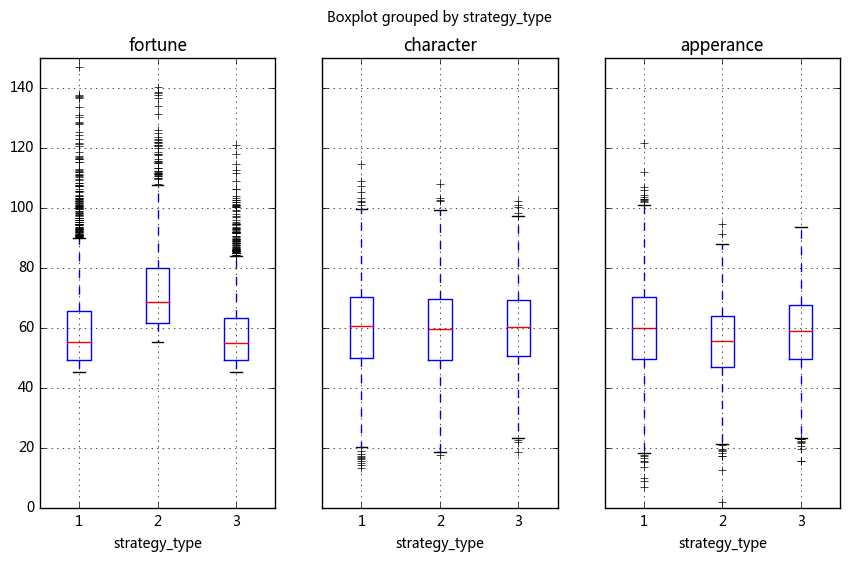

,内涵均值,外貌均值,财富均值
择偶策略1,60.082770,59.835858,59.573525
择偶策略2,59.348393,55.033131,73.002278
择偶策略3,59.868687,58.170981,57.808589


In [8]:
# 通过数据分析，回答几个问题：
#   ** 百分之多少的样本数据成功匹配到了对象？
#   ** 采取不同择偶策略的匹配成功率分别是多少？
#   ** 采取不同择偶策略的男性各项平均分是多少？

# ① 百分之多少的样本数据成功匹配到了对象？
print('%.2f%%的样本数据成功匹配到了对象\n---------' % (len(match_success1)/len(sample_m1)*100))

# ② 采取不同择偶策略的匹配成功率分别是多少？
print('择偶策略1的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==1])/len(sample_m1[sample_m1['strategy'] == 1])*100))
print('择偶策略2的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==2])/len(sample_m1[sample_m1['strategy'] == 2])*100))
print('择偶策略3的匹配成功率为%.2f%%' % (len(match_success1[match_success1['strategy_type']==3])/len(sample_m1[sample_m1['strategy'] == 3])*100))
print('\n---------')

# ③ 采取不同择偶策略的男性各项平均分是多少？
match_m1 = pd.merge(match_success1,sample_m1,left_on = 'm',right_index = True)
result_df = pd.DataFrame([{'财富均值':match_m1[match_m1['strategy_type'] == 1]['fortune'].mean(),
                          '内涵均值':match_m1[match_m1['strategy_type'] == 1]['character'].mean(),
                          '外貌均值':match_m1[match_m1['strategy_type'] == 1]['apperance'].mean()},
                         {'财富均值':match_m1[match_m1['strategy_type'] == 2]['fortune'].mean(),
                          '内涵均值':match_m1[match_m1['strategy_type'] == 2]['character'].mean(),
                          '外貌均值':match_m1[match_m1['strategy_type'] == 2]['apperance'].mean()},
                         {'财富均值':match_m1[match_m1['strategy_type'] == 3]['fortune'].mean(),
                          '内涵均值':match_m1[match_m1['strategy_type'] == 3]['character'].mean(),
                          '外貌均值':match_m1[match_m1['strategy_type'] == 3]['apperance'].mean()}],
                         index = ['择偶策略1','择偶策略2','择偶策略3'])
# 构建数据dataframe

print('择偶策略1的男性 → 财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % 
      (result_df.loc['择偶策略1']['财富均值'],result_df.loc['择偶策略1']['内涵均值'],result_df.loc['择偶策略1']['外貌均值']))
print('择偶策略2的男性 → 财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % 
      (result_df.loc['择偶策略2']['财富均值'],result_df.loc['择偶策略2']['内涵均值'],result_df.loc['择偶策略2']['外貌均值']))
print('择偶策略3的男性 → 财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % 
      (result_df.loc['择偶策略3']['财富均值'],result_df.loc['择偶策略3']['内涵均值'],result_df.loc['择偶策略3']['外貌均值']))

match_m1.boxplot(column = ['fortune','character','apperance'],by='strategy_type',figsize = (10,6),layout = (1,3))
plt.ylim(0,150)
plt.show()
# 绘制箱型图

result_df

In [ ]:
'''
3、以99男+99女的样本数据，绘制匹配折线图
要求：
① 生成样本数据，模拟匹配实验
② 生成绘制数据表格
③ bokhe制图
   ** 这里设置图例，并且可交互（消隐模式）
提示：
① bokeh制图时，y轴为男性，x轴为女性
② 绘制数据表格中，需要把男女性的数字编号提取出来，这样图表横纵轴好识别
③ bokhe绘制折线图示意：p.line([0,女性数字编号，女性数字编号],[男性数字编号，男性数字编号，0])

'''

In [9]:
# 生成样本数据，模拟匹配实验

sample_m2 = create_sample(99,'m')
sample_f2 = create_sample(99,'f')
sample_m2['strategy'] = np.random.choice([1,2,3],99)
# 设置好样本数据

test_m2 = sample_m2.copy()
test_f2 = sample_f2.copy()
# 复制数据

n = 1
# 设定实验次数变量

starttime = time.time()
# 记录起始时间

success_roundn = different_strategy(test_m2, test_f2,n)    
match_success2 = success_roundn                                      
test_m2 = test_m2.drop(success_roundn['m'].tolist())
test_f2 = test_f2.drop(success_roundn['f'].tolist())
print('成功进行第%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性和%i位女性' % 
      (n,len(success_roundn),len(match_success2),len(test_m2),len(test_f2)))
# 第一轮实验测试

while len(success_roundn) !=0:
    n += 1
    success_roundn = different_strategy(test_m2,test_f2,n)   
    #得到该轮成功匹配数据
    match_success2 = pd.concat([match_success2,success_roundn])           
    # 将成功匹配数据汇总
    test_m2 = test_m2.drop(success_roundn['m'].tolist())
    test_f2 = test_f2.drop(success_roundn['f'].tolist())
    # 输出下一轮实验数据
    print('成功进行第%i轮实验，本轮实验成功匹配%i对，总共成功匹配%i对，还剩下%i位男性和%i位女性' % 
          (n,len(success_roundn),len(match_success2),len(test_m2),len(test_f2)))
# 运行模型

endtime = time.time()
# 记录结束时间

print('------------')
print('本次实验总共进行了%i轮，配对成功%i对\n------------' % (n,len(match_success2)))
print('实验总共耗时%.2f秒' % (endtime - starttime))

成功进行第1轮实验，本轮实验成功匹配30对，总共成功匹配30对，还剩下69位男性和69位女性
成功进行第2轮实验，本轮实验成功匹配5对，总共成功匹配35对，还剩下64位男性和64位女性
成功进行第3轮实验，本轮实验成功匹配3对，总共成功匹配38对，还剩下61位男性和61位女性
成功进行第4轮实验，本轮实验成功匹配0对，总共成功匹配38对，还剩下61位男性和61位女性
------------
本次实验总共进行了4轮，配对成功38对
------------
实验总共耗时1.06秒


In [10]:
# 生成绘制数据表格

from bokeh.palettes import brewer
# 导入调色模块

# 设置调色盘
graphdata1 = match_success2.copy()
graphdata1 = pd.merge(graphdata1,sample_m2,left_on = 'm',right_index = True)
graphdata1 = pd.merge(graphdata1,sample_f2,left_on = 'f',right_index = True)
# 合并数据，得到成功配对的男女各项分值

graphdata1['x'] = '0,' + graphdata1['f'].str[1:] + ',' + graphdata1['f'].str[1:]
graphdata1['x'] = graphdata1['x'].str.split(',')
graphdata1['y'] = graphdata1['m'].str[1:] + ',' + graphdata1['m'].str[1:] + ',0'
graphdata1['y'] = graphdata1['y'].str.split(',')
# 筛选出id的数字编号，制作x，y字段

round_num = graphdata1['round_n'].max()
color = brewer['Blues'][round_num+1]   # 这里+1是为了得到一个色带更宽的调色盘，避免最后一个颜色太浅
graphdata1['color'] = ''
for rn in graphdata1['round_n'].value_counts().index:
    graphdata1['color'][graphdata1['round_n'] == rn] = color[rn-1] 
# 设置颜色

graphdata1 = graphdata1[['m','f','strategy_type','round_n','score_x','score_y','x','y','color']]
# 筛选字段

graphdata1.head()

,m,f,strategy_type,round_n,score_x,score_y,x,y,color
0,m75,f10,1,1,45.184407,61.006727,"[0, 10, 10]","[75, 75, 0]",#2171b5
1,m27,f12,1,1,53.110282,67.351083,"[0, 12, 12]","[27, 27, 0]",#2171b5
2,m42,f15,1,1,55.847283,62.969471,"[0, 15, 15]","[42, 42, 0]",#2171b5
3,m49,f17,1,1,64.669171,57.737541,"[0, 17, 17]","[49, 49, 0]",#2171b5
4,m62,f18,1,1,73.177847,71.839048,"[0, 18, 18]","[62, 62, 0]",#2171b5


In [11]:
# bokeh绘图

p = figure(plot_width=500, plot_height=500,title="配对实验过程模拟示意" ,tools= 'reset,wheel_zoom,pan')   # 构建绘图空间

for datai in graphdata1.values:
    p.line(datai[-3],datai[-2],line_width=1, line_alpha = 0.8, line_color = datai[-1],line_dash = [10,4],legend= 'round %i' % datai[3])  
    # 绘制折线
    p.circle(datai[-3],datai[-2],size = 3,color = datai[-1],legend= 'round %i' % datai[3])
    # 绘制点

p.ygrid.grid_line_dash = [6, 4]
p.xgrid.grid_line_dash = [6, 4]
p.legend.location = "top_right"
p.legend.click_policy="hide"
# 设置其他参数

show(p)

In [ ]:
'''
4、生成“不同类型男女配对成功率”矩阵图
要求：
① 以之前1万男+1万女实验的结果为数据
② 按照财富值、内涵值、外貌值分别给三个区间，以区间来评判“男女类型”
   ** 高分（70-100分），中分（50-70分），低分（0-50分）
   ** 按照此类分布，男性女性都可以分为27中类型：财高品高颜高、财高品中颜高、财高品低颜高、... （财→财富，品→内涵，颜→外貌）
③ bokhe制图
   ** 散点图
   ** 27行*27列，散点的颜色深浅代表匹配成功率
提示：
① 注意绘图的数据结构
② 这里散点图通过xy轴定位数据，然后通过设置颜色的透明度来表示匹配成功率
③ alpha字段为每种类型匹配成功率标准化之后的结果，再乘以一个参数
   → data['alpha'] = (data['chance'] - data['chance'].min())/(data['chance'].max() - data['chance'].min())*8   

'''

In [12]:
# 数据清洗

graphdata2 = match_success1.copy()
graphdata2 = pd.merge(graphdata2,sample_m1,left_on = 'm',right_index = True)
graphdata2 = pd.merge(graphdata2,sample_f1,left_on = 'f',right_index = True)
# 合并数据，得到成功配对的男女各项分值

graphdata2 = graphdata2[['m','f','apperance_x','character_x','fortune_x','apperance_y','character_y','fortune_y']]
# 筛选字段

graphdata2['for_m'] = pd.cut(graphdata2['fortune_x'],[0,50,70,500],labels = ['财低','财中','财高'])
graphdata2['cha_m'] = pd.cut(graphdata2['character_x'],[0,50,70,500],labels = ['品低','品中','品高'])
graphdata2['app_m'] = pd.cut(graphdata2['apperance_x'],[0,50,70,500],labels = ['颜低','颜中','颜高'])
graphdata2['for_f'] = pd.cut(graphdata2['fortune_y'],[0,50,70,500],labels = ['财低','财中','财高'])
graphdata2['cha_f'] = pd.cut(graphdata2['character_y'],[0,50,70,500],labels = ['品低','品中','品高'])
graphdata2['app_f'] = pd.cut(graphdata2['apperance_y'],[0,50,70,500],labels = ['颜低','颜中','颜高'])
# 指标区间划分

graphdata2['type_m'] = graphdata2['for_m'].astype(np.str) + graphdata2['cha_m'].astype(np.str) + graphdata2['app_m'].astype(np.str)
graphdata2['type_f'] = graphdata2['for_f'].astype(np.str) + graphdata2['cha_f'].astype(np.str) + graphdata2['app_f'].astype(np.str) 

graphdata2 = graphdata2[['m','f','type_m','type_f']]
# 筛选字段

graphdata2.head()

,m,f,type_m,type_f
0,m1017,f1,财中品高颜中,财中品中颜中
1,m8210,f10,财高品中颜高,财高品低颜中
2,m4023,f100,财中品低颜低,财中品低颜中
3,m2601,f1002,财高品高颜高,财高品中颜中
4,m8351,f1016,财低品低颜中,财低品高颜低


In [13]:
# 匹配成功率计算

success_n = len(graphdata2)
success_chance = graphdata2.groupby(['type_m','type_f']).count().reset_index()
success_chance['chance'] = success_chance['m']/success_n
success_chance['alpha'] = (success_chance['chance'] - success_chance['chance'].min())/(success_chance['chance'].max() - success_chance['chance'].min())*8   # 设置alpha参数
success_chance.head()

,type_m,type_f,m,f,chance,alpha
0,财中品中颜中,财中品中颜中,305,305,0.043067,8.000000
1,财中品中颜中,财中品中颜低,51,51,0.007201,1.315789
2,财中品中颜中,财中品中颜高,70,70,0.009884,1.815789
3,财中品中颜中,财中品低颜中,61,61,0.008613,1.578947
4,财中品中颜中,财中品低颜低,12,12,0.001694,0.289474


In [14]:
# bokeh绘图

mlst = success_chance['type_m'].value_counts().index.tolist()
flst = success_chance['type_f'].value_counts().index.tolist()
source = ColumnDataSource(success_chance)    # 创建数据
hover = HoverTool(tooltips=[("男性类别", "@type_m"),
                           ("女性类别","@type_f"),
                           ("匹配成功率","@chance")]) # 设置标签显示内容

p = figure(plot_width=800, plot_height=800,x_range = mlst, y_range = flst,
           title="不同类型男女配对成功率" ,x_axis_label = '男', y_axis_label = '女',    # X,Y轴label
           tools= [hover,'reset,wheel_zoom,pan,lasso_select'])   # 构建绘图空间

p.square_cross(x = 'type_m', y = 'type_f', source = source,size = 18 ,color = 'red',alpha = 'alpha')
# 绘制点

p.ygrid.grid_line_dash = [6, 4]
p.xgrid.grid_line_dash = [6, 4]
p.xaxis.major_label_orientation = "vertical"
# 设置其他参数

show(p)